<a href="https://colab.research.google.com/github/Anan-punathil/Capstone-Entri-ML-Regression/blob/main/Capstone_Entri_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Amazon Customer Behavior Prediction Model**
Name: ANAN P

Organization: Entri Elevate

Date: 16/08/2024


**Introduction to Dataset**

The Amazon Customer Behavior Survey dataset provides detailed insights into customer experiences and behaviors on the Amazon platform. It includes various demographic, behavioral, and transactional data to help understand and predict customer satisfaction levels. This dataset is vital for assessing customer satisfaction, which is critical for improving customer experiences and enhancing service quality.

**Objective**

The primary objective of this project is to develop a predictive model that accurately forecasts customer satisfaction based on their behavior and interaction with the Amazon platform. This model will help Amazon and similar e-commerce platforms identify areas of improvement and make data-driven decisions to enhance customer satisfaction.

**Data Description**

*  The dataset comprises several features that may influence customer satisfaction, including:


**Customer Information**

  * Age: The customer’s age in years.

  * Gender: The customer’s gender identity.

  * Education Level: The highest level of education attained by the customer.

* Employment Status: The customer’s current employment status.

* Annual Income: The customer’s annual income.

* City: The city where the customer resides.

* State: The state where the customer resides.

* Country: The country where the customer resides.

**Shopping Behavior**

* Purchase Frequency: The frequency of purchases made by the customer.

* Product Categories Purchased: Categories of products frequently bought by the customer.

* Average Order Value: The average value of a single order made by the customer.

**Customer Feedback**

* Customer Reviews Importance: The importance the customer places on reviews when making purchasing decisions.

* Product Rating Accuracy: How accurately the customer believes the product ratings reflect the product quality.

* Return Rate: The frequency at which the customer returns purchased items.

**Shopping Satisfaction** (Target Variable)

* Shopping Satisfaction: A numerical rating or categorical label indicating the customer’s overall satisfaction with their shopping experience.

**Goals**

*Data Exploration and Preprocessing:*


* Perform exploratory data analysis (EDA) to identify patterns, trends, and anomalies in customer behavior.

* Clean the dataset by handling missing values, outliers, and inconsistencies.

* Transform the data by encoding categorical variables, scaling numerical variables, and creating new features where necessary.

**Feature Selection:**

* Identify the most relevant features that significantly impact shopping satisfaction prediction.

* Reduce dimensionality to enhance model performance and interpretability.

**Model Development:**

* Train various machine learning models such as logistic regression, decision trees, random forests, gradient boosting, and neural networks.

* Evaluate the models using appropriate metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc.

* Select the best-performing model based on evaluation metrics and validation techniques.

**Model Interpretation:**

* Interpret the model’s predictions to understand the factors contributing to customer satisfaction.

* Use techniques like feature importance to provide insights into the model’s decision-making process.

**Deployment:**

* Develop a user-friendly interface or dashboard for stakeholders to input new data and receive customer satisfaction predictions.

* Ensure the model is scalable and can handle real-time data inputs for continuous assessment.

**Documentation and Reporting:**

* Document the entire process, including data exploration, preprocessing steps, model development, and evaluation.

* Prepare a comprehensive report that highlights key findings, model performance, and actionable insights for stakeholders.

**Expected Outcomes**

* A robust predictive model that accurately assesses customer satisfaction.

* Improved decision-making capabilities for e-commerce platforms regarding customer experience management.

* Enhanced understanding of the factors influencing customer satisfaction and potential areas for improvement.

**Challenges**

* Ensuring data quality and completeness for accurate model training.

* Balancing model complexity and interpretability to provide meaningful insights.

* Addressing potential biases in the data to avoid unfair satisfaction assessments.

**Conclusion**

* The successful completion of this project will provide a valuable tool for e-commerce platforms like Amazon to manage customer satisfaction effectively. It will contribute to more informed decision-making processes, ultimately leading to improved customer experiences and increased customer loyalty.

**Data Source**

You can use easily download the dataset using this link

In [ ]:
!wget https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data?select=Amazon+Customer+Behavior+Survey.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('/content/Amazon Customer Behavior Survey (1) (1).csv')
print(df.describe())


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [ ]:
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [ ]:
print(df.head())

                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [ ]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
df["Shopping_Satisfaction"].value_counts()

,count
Shopping_Satisfaction,
3,209
2,194
1,115
4,67
5,17


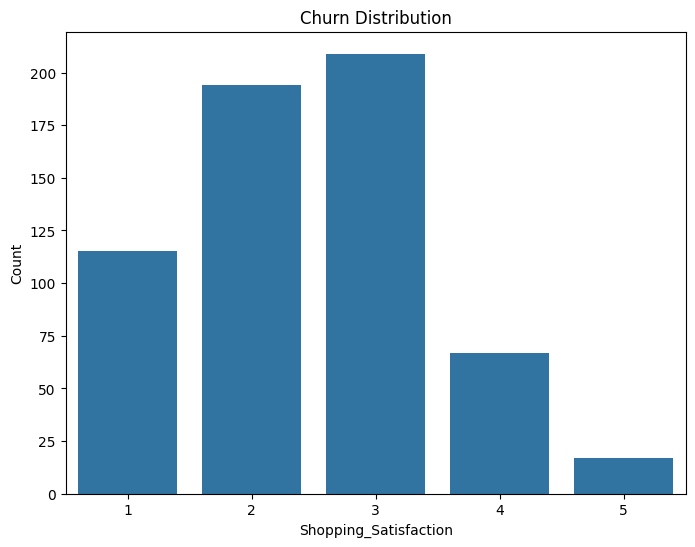

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Shopping_Satisfaction",data=df)
plt.title('Churn Distribution')
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define satisfaction classes based on satisfaction score
def classify_satisfaction(score):
    if score <= 2:
        return 'Low'
    elif 3 == score :
        return 'Medium'
    else :
        return 'High'

# Apply classification
df['satisfaction_class'] = df['Shopping_Satisfaction'].apply(classify_satisfaction)


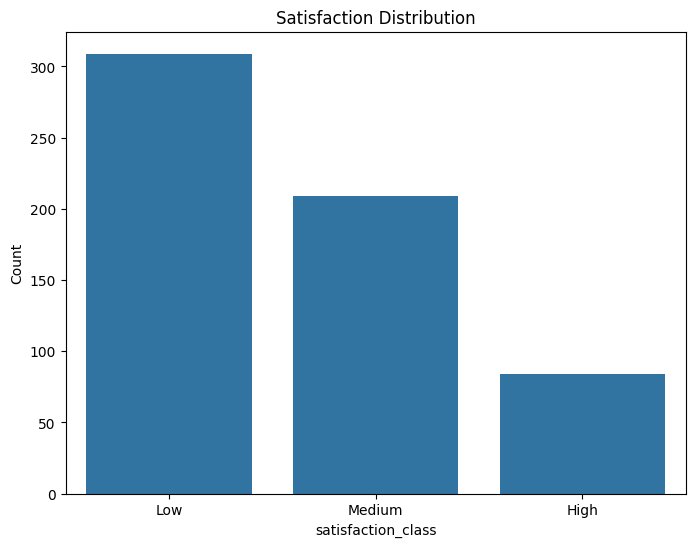

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="satisfaction_class",data=df)
plt.title('Satisfaction Distribution')
plt.xlabel('satisfaction_class')
plt.ylabel('Count')
plt.show()

**Addressing Imbalanced Data**

The data is imbalanced, consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.

Remember: The best approach depends on the specific characteristics of your dataset and the problem you're trying to solve.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
df.describe()


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df["satisfaction_class"].value_counts()


,count
satisfaction_class,
Low,309
Medium,209
High,84


Features and Target variable

In [ ]:
# List the features
features = df.columns.tolist()
features.remove('satisfaction_class')
print("Features in the dataset:")
for feature in features:
    print(feature)

# Identify the target variable
target = 'satisfaction_class'
print("\nTarget variable:")
print(target)

Features in the dataset:
Timestamp
age
Gender
Purchase_Frequency
Purchase_Categories
Personalized_Recommendation_Frequency
Browsing_Frequency
Product_Search_Method
Search_Result_Exploration
Customer_Reviews_Importance
Add_to_Cart_Browsing
Cart_Completion_Frequency
Cart_Abandonment_Factors
Saveforlater_Frequency
Review_Left
Review_Reliability
Review_Helpfulness
Personalized_Recommendation_Frequency 
Recommendation_Helpfulness
Rating_Accuracy 
Shopping_Satisfaction
Service_Appreciation
Improvement_Areas

Target variable:
satisfaction_class


In [ ]:
print(df.shape)

(602, 24)


In [ ]:
print(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'satisfaction_class'],
      dtype='object')


checking for duplicates

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas, satisfaction_class]
Index: []

[0 rows x 24 columns]


There are no duplicate rows in our DataFrame according to the criteria used by the data.duplicated() method. This indicates that every row in our DataFrame is unique.

# **Data preprocessing**


handling missing

In [ ]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [ ]:
df.nunique()

,0
Timestamp,601
age,50
Gender,4
Purchase_Frequency,5
Purchase_Categories,29
Personalized_Recommendation_Frequency,3
Browsing_Frequency,4
Product_Search_Method,4
Search_Result_Exploration,2
Customer_Reviews_Importance,5



We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.

Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not

In [ ]:
df["satisfaction_class"].head(10)

,satisfaction_class
0,Low
1,Low
2,Medium
3,High
4,Low
5,Low
6,Medium
7,Medium
8,Low
9,High


#detecting outliers#

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

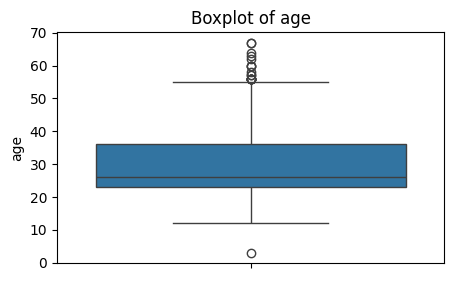

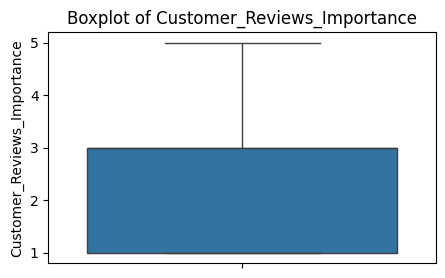

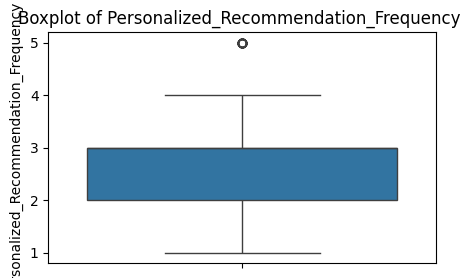

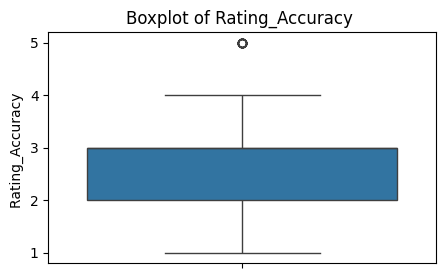

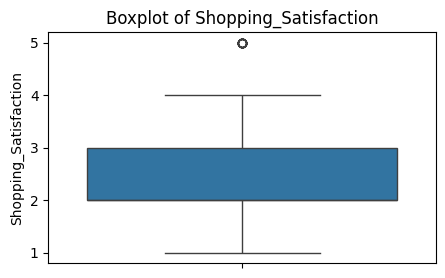

In [ ]:
for column in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**handling outlier**(capping)

In [ ]:
# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection, but exclude 'Rating' columns
for feature in numerical_features:
    if 'Rating' not in feature:  # Exclude 'Rating' columns
        lower_bound = Q1[feature] - 1.5 * IQR[feature]
        upper_bound = Q3[feature] + 1.5 * IQR[feature]

        # Cap outliers for the current feature
        df[feature] = np.clip(df[feature], lower_bound, upper_bound)

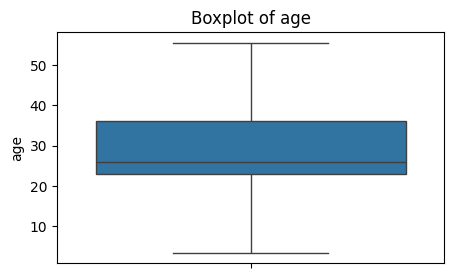

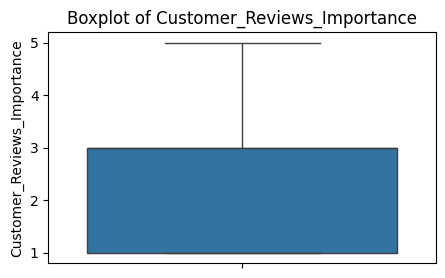

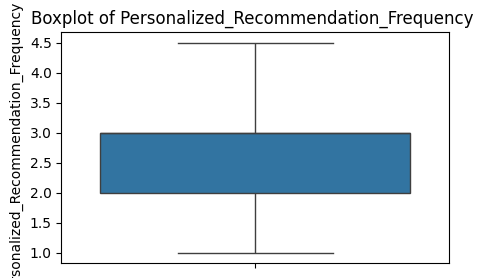

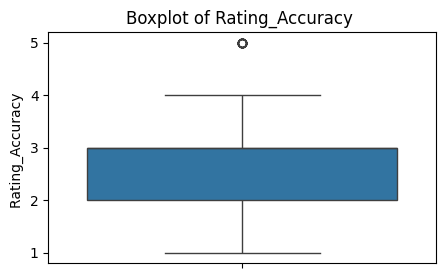

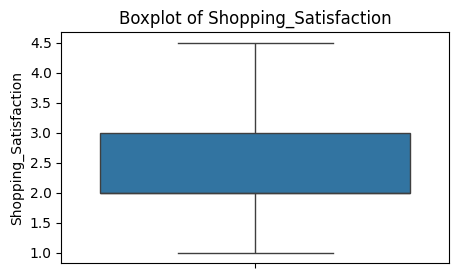

In [ ]:
for column in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
df.shape

(602, 24)

**Exploratory Data Analysis(EDA)**

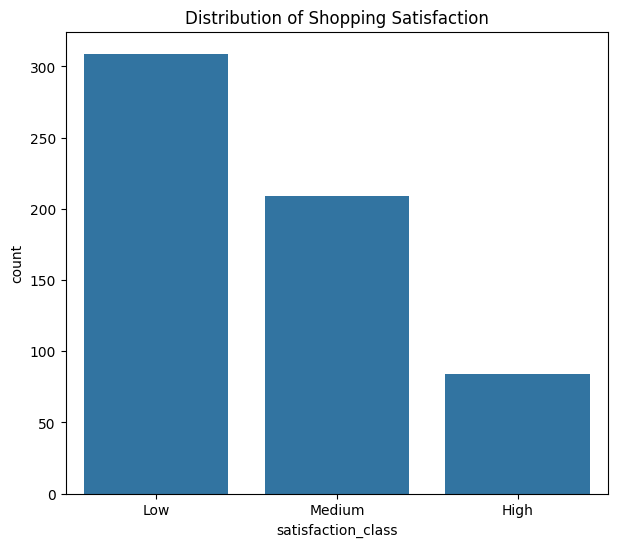

In [ ]:
# Distribution of shopping satisfaction
plt.figure(figsize=(7, 6))
sns.countplot(x='satisfaction_class', data=df)
plt.title('Distribution of Shopping Satisfaction')
plt.show()


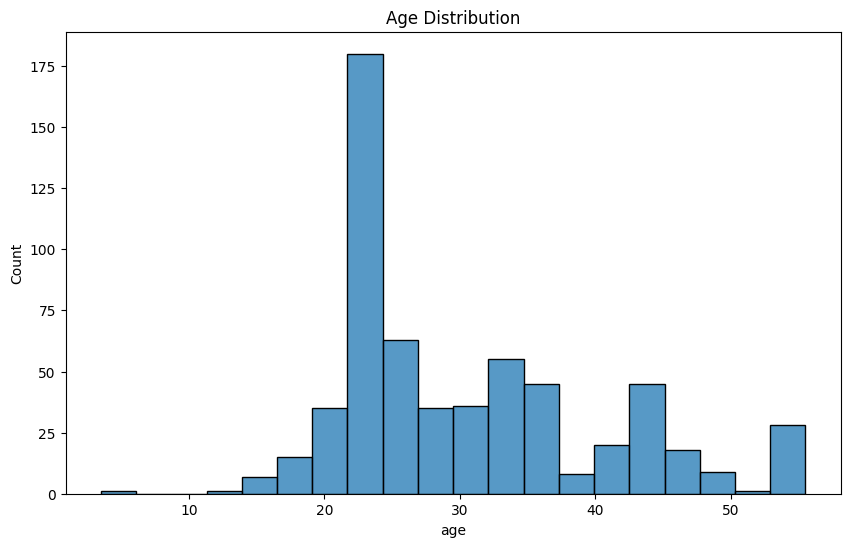

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()


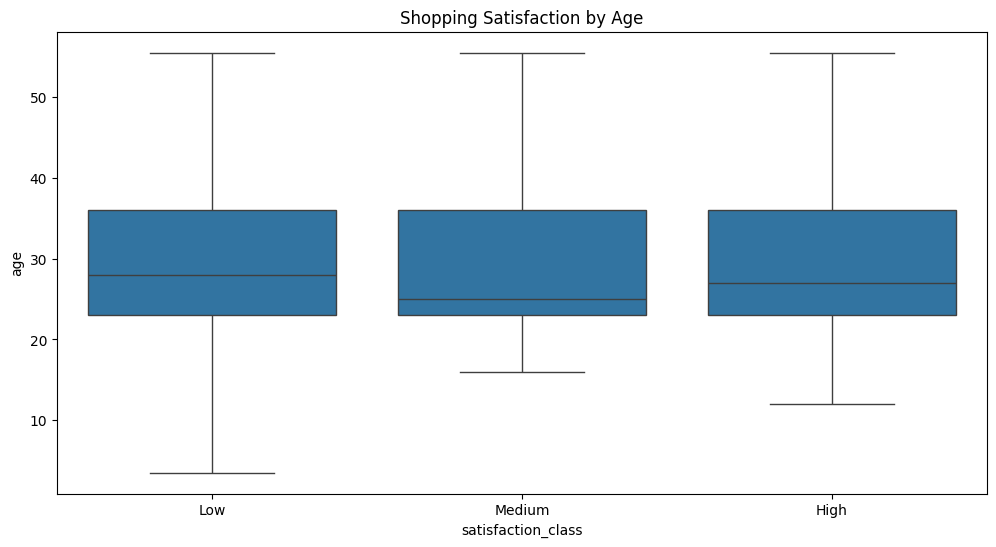

In [ ]:
# Boxplot of shopping satisfaction by age
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction_class', y='age', data=df)
plt.title('Shopping Satisfaction by Age')
plt.show()


pairplot for numerical features

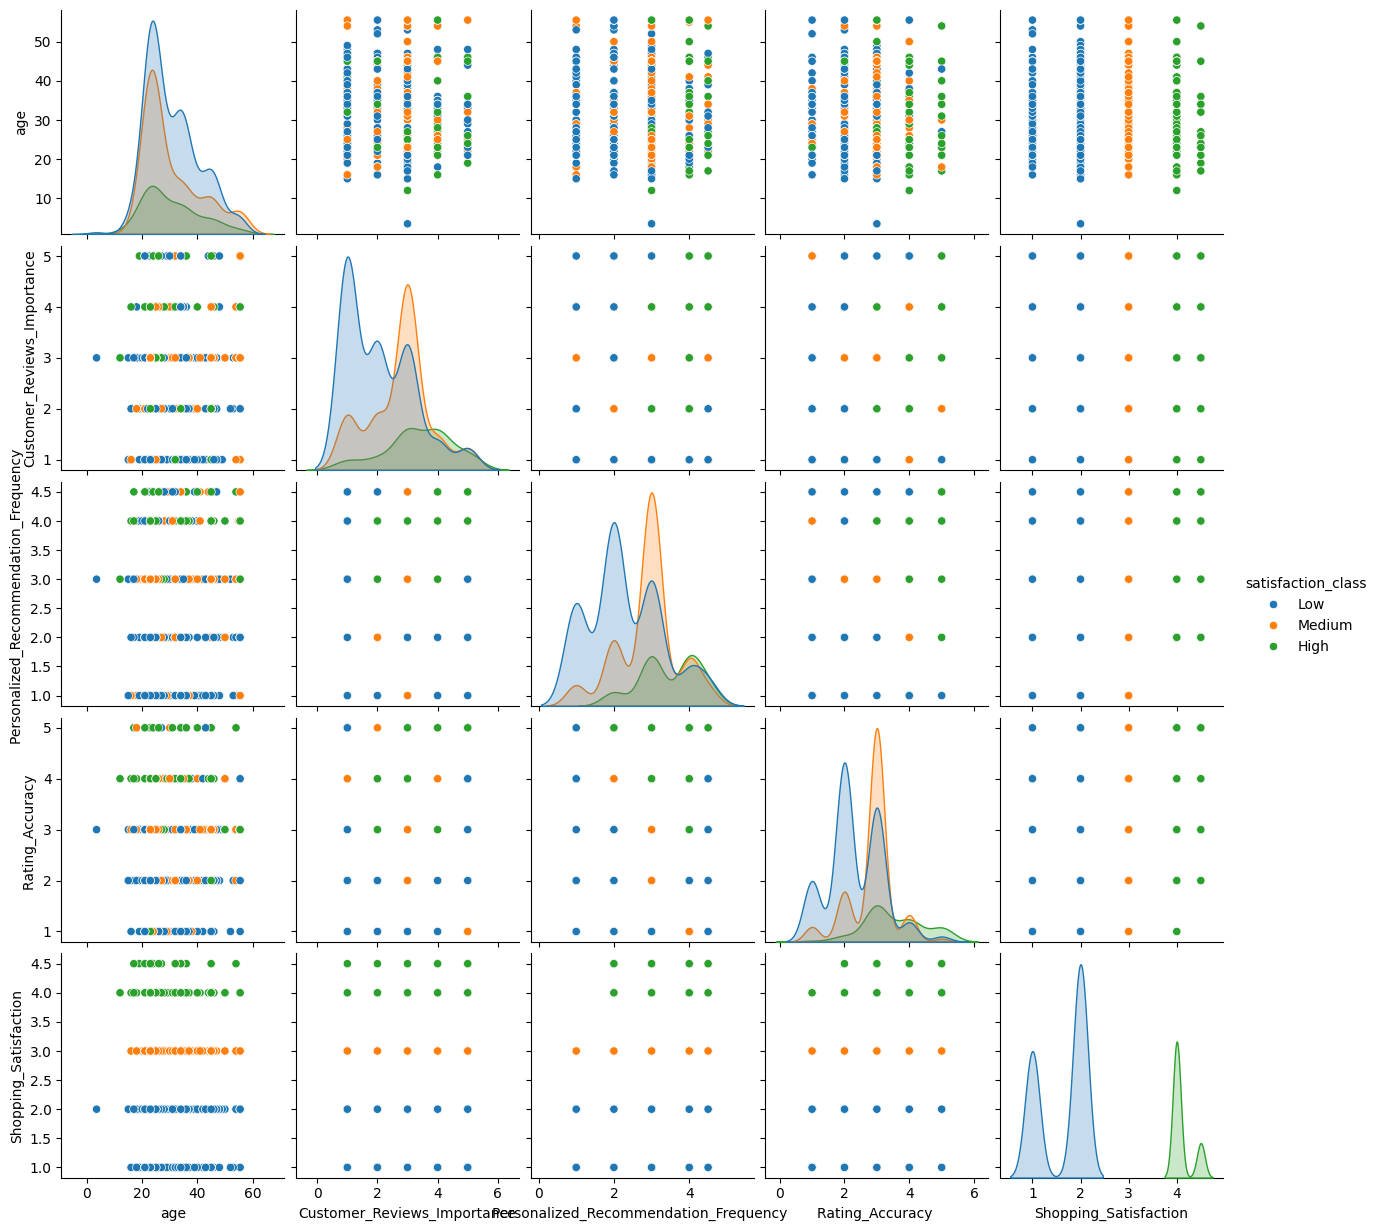

In [ ]:
# Identifying numerical features in the DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a pairplot with numerical features
sns.pairplot(df, vars=numerical_features, hue='satisfaction_class')

plt.show()


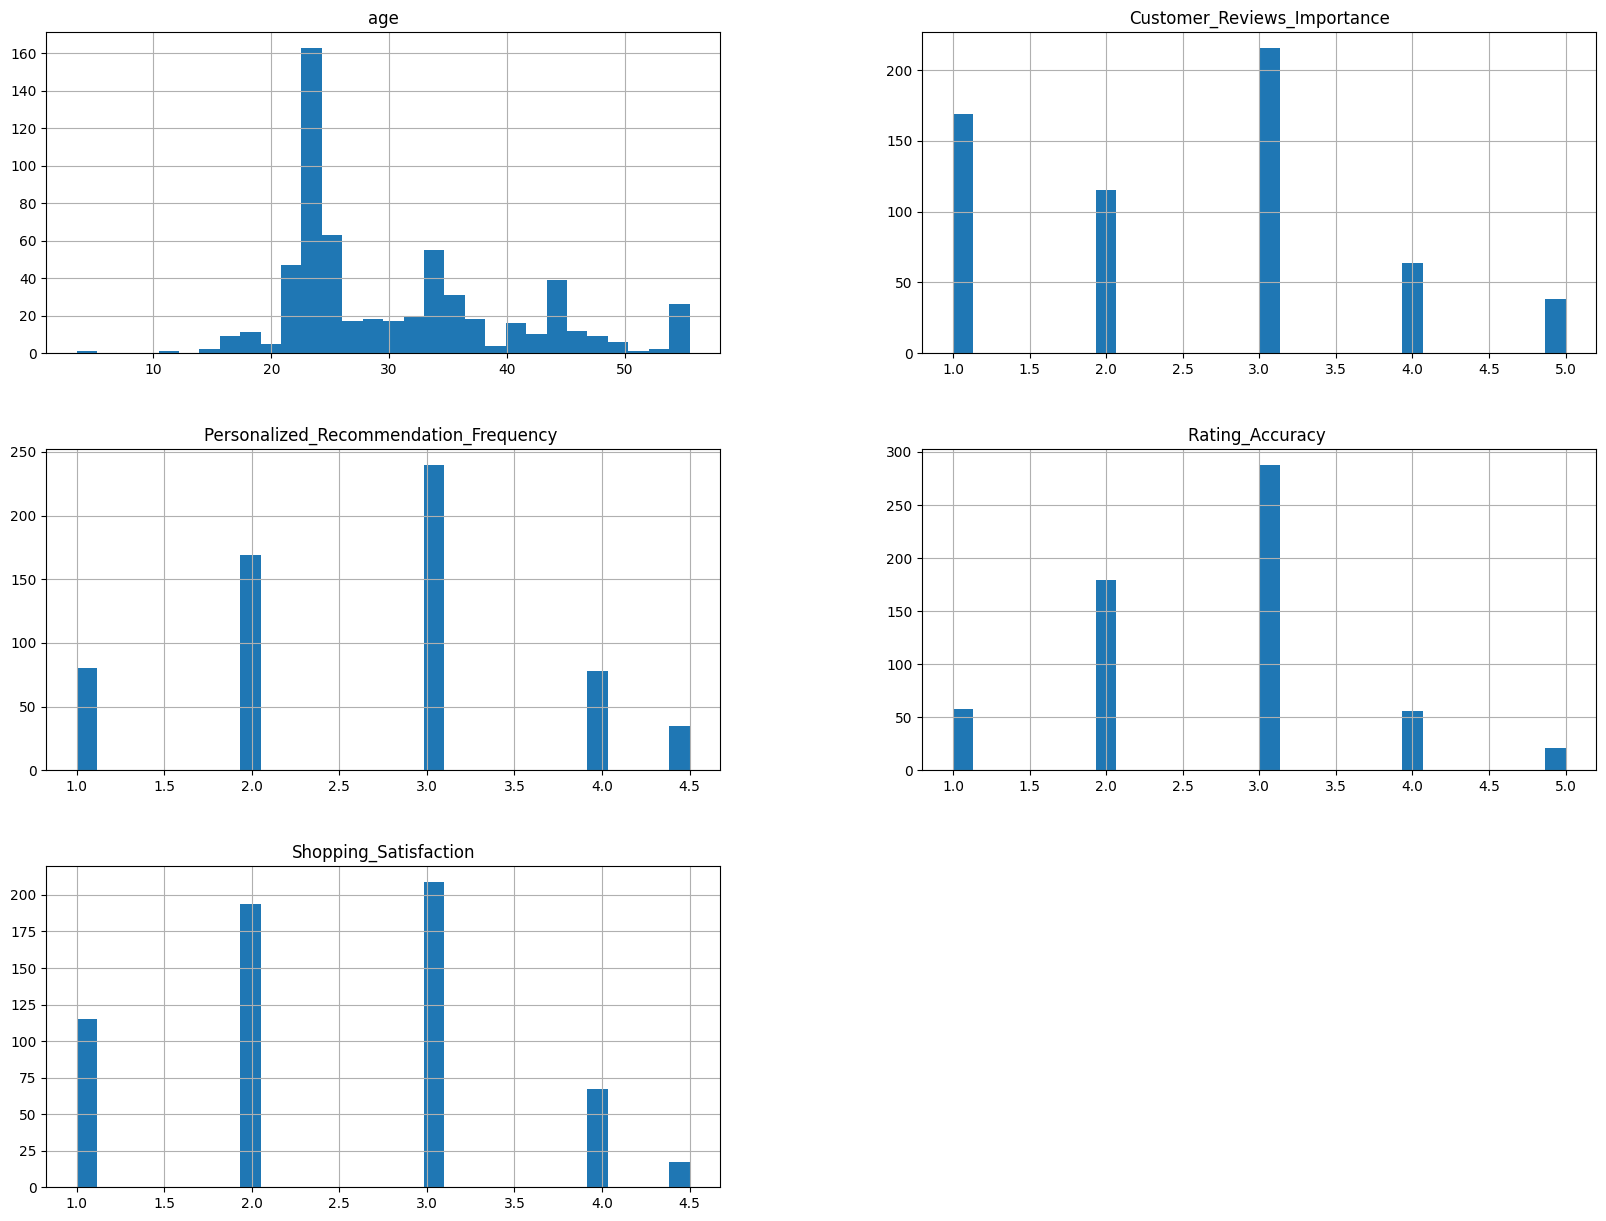

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

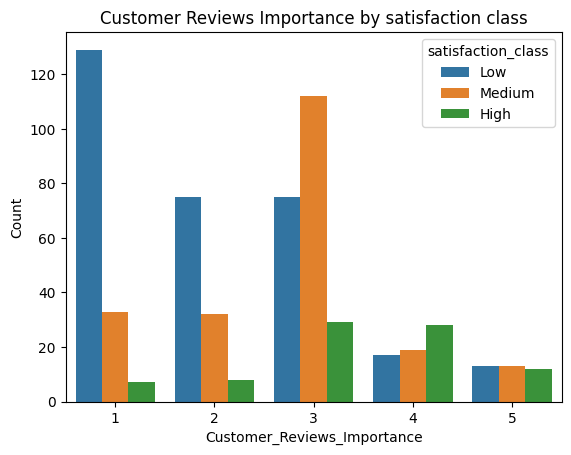

In [ ]:
sns.countplot(x='Customer_Reviews_Importance', hue='satisfaction_class', data=df)
plt.title('Customer Reviews Importance by satisfaction class')
plt.xlabel('Customer_Reviews_Importance')
plt.ylabel('Count')
plt.show()

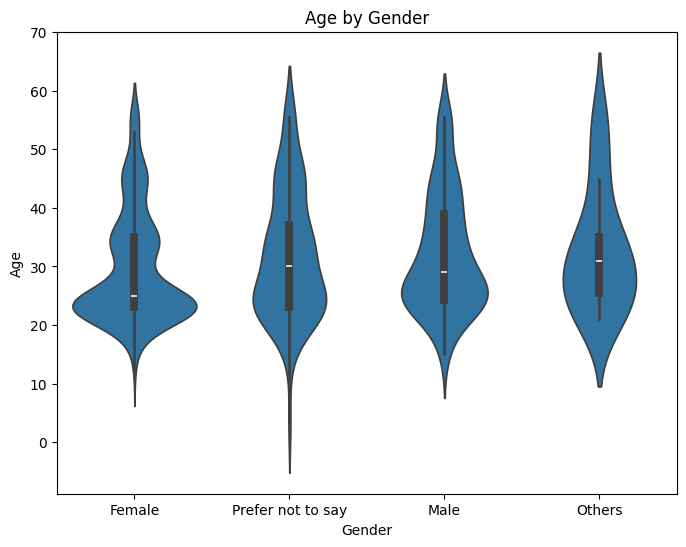

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='age', data=df)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

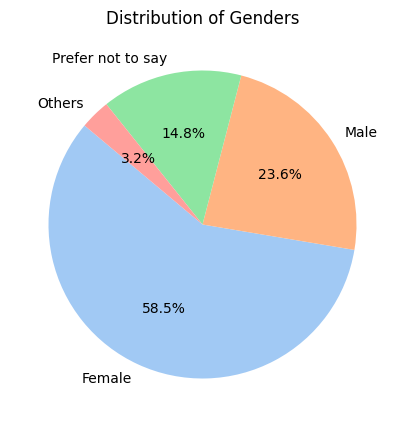

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Distribution of Genders')

# Display the pie chart
plt.show()

# **Feature engineering**


In [ ]:
df['satisfaction_class'].value_counts()

,count
satisfaction_class,
Low,309
Medium,209
High,84


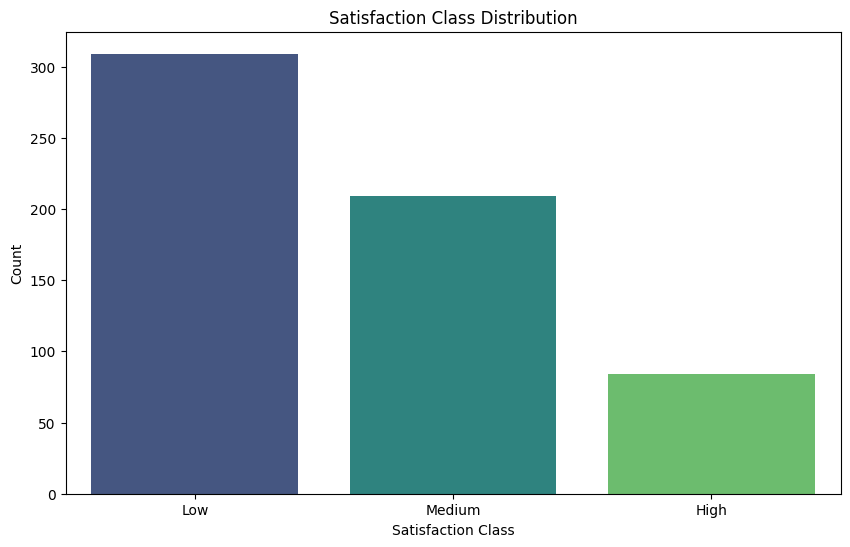

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_class', data=df, palette='viridis')
plt.title('Satisfaction Class Distribution')
plt.xlabel('Satisfaction Class')
plt.ylabel('Count')
plt.show()


**Label Encoding**

In [ ]:
numerical_features

['age',
 'Customer_Reviews_Importance',
 'Personalized_Recommendation_Frequency ',
 'Rating_Accuracy ',
 'Shopping_Satisfaction']

In [ ]:
categorical_features

['Timestamp',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Improvement_Areas',
 'satisfaction_class']

In [ ]:
# Assuming 'df' is your DataFrame
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical features to encode
# Verify the spelling and case of column names against the DataFrame
categorical_features = ['Timestamp',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Improvement_Areas',
 'satisfaction_class']

# Apply label encoding to each categorical feature
for feature in categorical_features:
    # Check if the column exists in the DataFrame before encoding
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])
    else:
        print(f"Column '{feature}' not found in DataFrame.")

**Visualize data distribution**

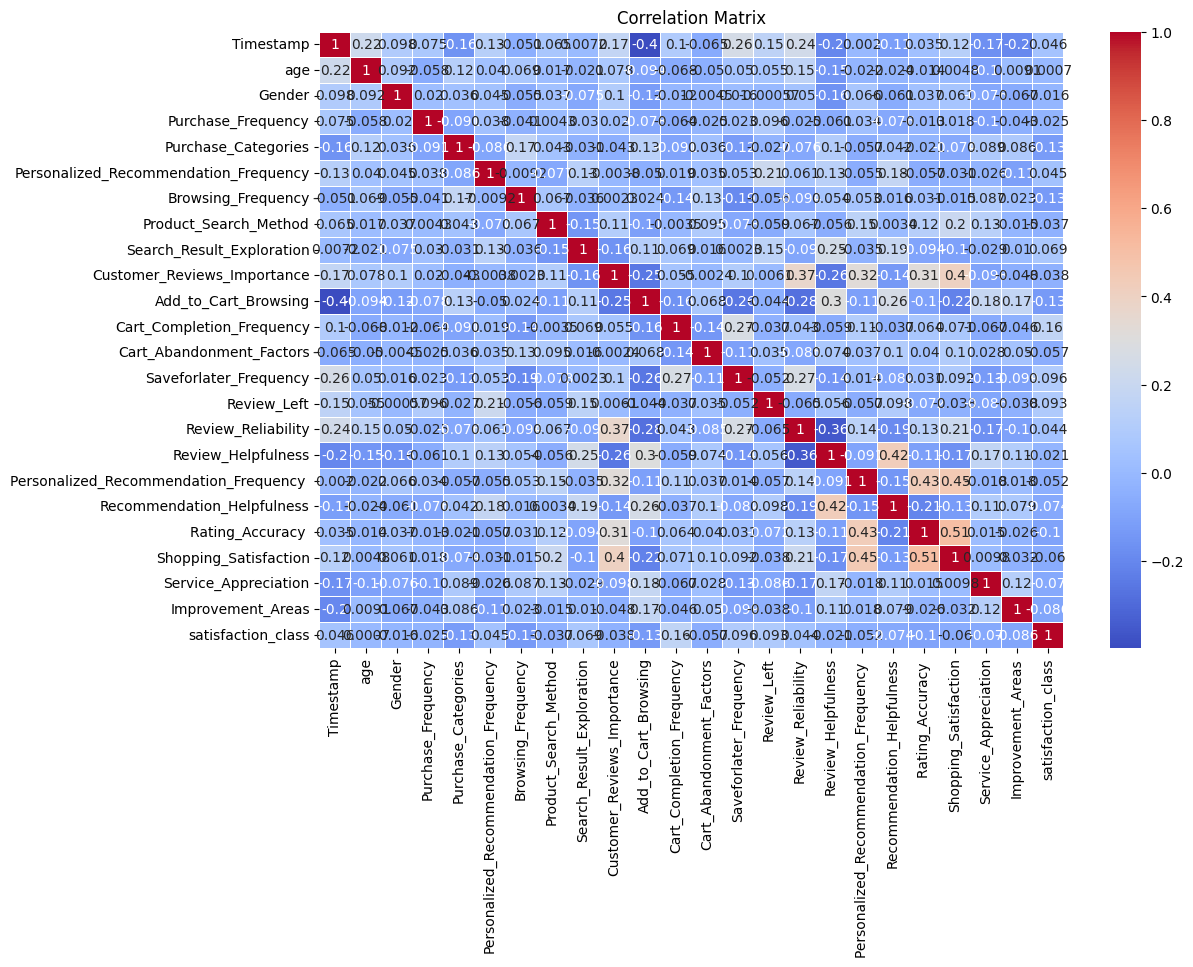

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(['float64','int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**ML**


In [ ]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,satisfaction_class
0,9,23.0,0,0,0,2,1,1,1,1,...,1,3,2,2.0,2,1,1.0,2,11,1
1,10,23.0,0,3,8,2,0,1,1,1,...,0,0,2,2.0,1,3,2.0,8,11,1
2,11,24.0,3,0,20,0,0,1,1,2,...,0,3,0,4.0,0,3,3.0,2,9,2
3,12,24.0,0,3,4,1,0,1,0,5,...,1,0,2,3.0,1,3,4.0,2,9,0
4,13,22.0,0,1,1,2,0,0,1,1,...,0,0,2,4.0,2,2,2.0,2,9,1


Lets make a copy of sampled dataset before applying scaling.



In [ ]:
dfc= df.copy()

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression(solver='newton-cg',random_state=42)
dt  = DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

models = [rfc, svc, gbc, lgr,dt, knn]

names = ["Random Forest", "Support Vector Machine",
        "Gradient Boostng", "Logistic Regression","Decision Tree Classifier","K Neighbors Classifier"]

In [ ]:
#x = df.drop('satisfaction_class', axis=1)
#y = df['satisfaction_class']
#X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Lets create a function to evaluate different models in different way.



In [ ]:
def evaluate_models(X_train, y_train, X_test, y_test, models, names):
    ac = []

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        ac.append(accuracy)
        print(f'{names[index]} accuracy: {round(accuracy,4)}')
        print(classification_report(y_test, pred))

    acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})

    # Convert accuracy to percentage
    acc_df['Accuracy'] = acc_df['Accuracy'] * 100

    # Create horizontal bar plot
    fig, ax = plt.subplots()
    ax.barh(acc_df['Model'], acc_df['Accuracy'], color='brown')

    for index, value in enumerate(acc_df['Accuracy']):
        ax.text(value, index, f'{value:.2f}%', va='center')

    # Set titles and labels
    ax.set_title('Model Accuracy')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Model')

    plt.show()

In [ ]:
#evaluate_models(X_train, y_train, X_test, y_test, models, names)

**Standard Scaling**

In [ ]:
scaler = StandardScaler()

#Apply scalingcal_features
dfc[numerical_features] = scaler.fit_transform(dfc[numerical_features])

In [ ]:
# Display the scaled features
print(dfc[numerical_features].head())

        age  Customer_Reviews_Importance  \
0 -0.778740                    -1.249802   
1 -0.778740                    -1.249802   
2 -0.677312                    -0.405379   
3 -0.677312                     2.127889   
4 -0.880168                    -1.249802   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                               -0.682684         -1.860694   
1                               -0.682684          0.364009   
2                                1.354371          0.364009   
3                                0.335843          0.364009   
4                                1.354371         -0.748343   

   Shopping_Satisfaction  
0              -1.480780  
1              -0.459084  
2               0.562611  
3               1.584307  
4              -0.459084  


In [ ]:
x = dfc.drop('satisfaction_class', axis=1)
y = dfc['satisfaction_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest accuracy: 0.9917
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        56
           2       0.98      1.00      0.99        45

    accuracy                           0.99       121
   macro avg       0.99      0.98      0.99       121
weighted avg       0.99      0.99      0.99       121

Support Vector Machine accuracy: 0.4628
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.49      0.86      0.63        56
           2       0.33      0.18      0.23        45

    accuracy                           0.46       121
   macro avg       0.28      0.34      0.29       121
weighted avg       0.35      0.46      0.38       121

Gradient Boostng accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00    

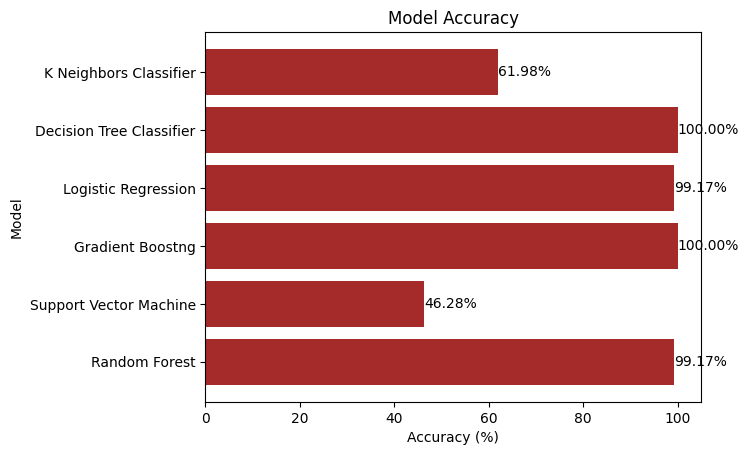

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

"We can observe that the accuracy of KNN classifier has increased from 55.91% to 61.98% after scaling. rest all classifier not much changed and thi swas done before performing feature selection.

**Feature selection**

*SelectKbest-Filter Method*

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

X_categorical = dfc[categorical_features]
X_numerical = dfc[numerical_features]

# Chi-squared test for categorical features
chi_selector = SelectKBest(chi2, k=5)  # Adjust k as needed
X_chi = chi_selector.fit_transform(X_categorical, y)
chi_selected_features = X_categorical.columns[chi_selector.get_support()]

# ANOVA for numerical features
f_selector = SelectKBest(f_classif, k=5)
X_f = f_selector.fit_transform(X_numerical, y)
f_selected_features = X_numerical.columns[f_selector.get_support()]

print("Chi-squared selected features:", chi_selected_features)
print("ANOVA selected features:", f_selected_features)

Chi-squared selected features: Index(['Timestamp', 'Purchase_Categories', 'Add_to_Cart_Browsing',
       'Review_Reliability', 'satisfaction_class'],
      dtype='object')
ANOVA selected features: Index(['age', 'Customer_Reviews_Importance',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')


In [ ]:
combined_features = pd.Index(chi_selected_features).union(pd.Index(f_selected_features))
dfc[combined_features].head()

,Add_to_Cart_Browsing,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Purchase_Categories,Rating_Accuracy,Review_Reliability,Shopping_Satisfaction,Timestamp,age,satisfaction_class
0,2,-1.249802,-0.682684,0,-1.860694,3,-1.480780,9,-0.778740,1
1,2,-1.249802,-0.682684,8,0.364009,0,-0.459084,10,-0.778740,1
2,2,-0.405379,1.354371,20,0.364009,3,0.562611,11,-0.677312,2
3,0,2.127889,0.335843,4,0.364009,0,1.584307,12,-0.677312,0
4,2,-1.249802,1.354371,1,-0.748343,0,-0.459084,13,-0.880168,1


*Visualizing relationships of selected features*

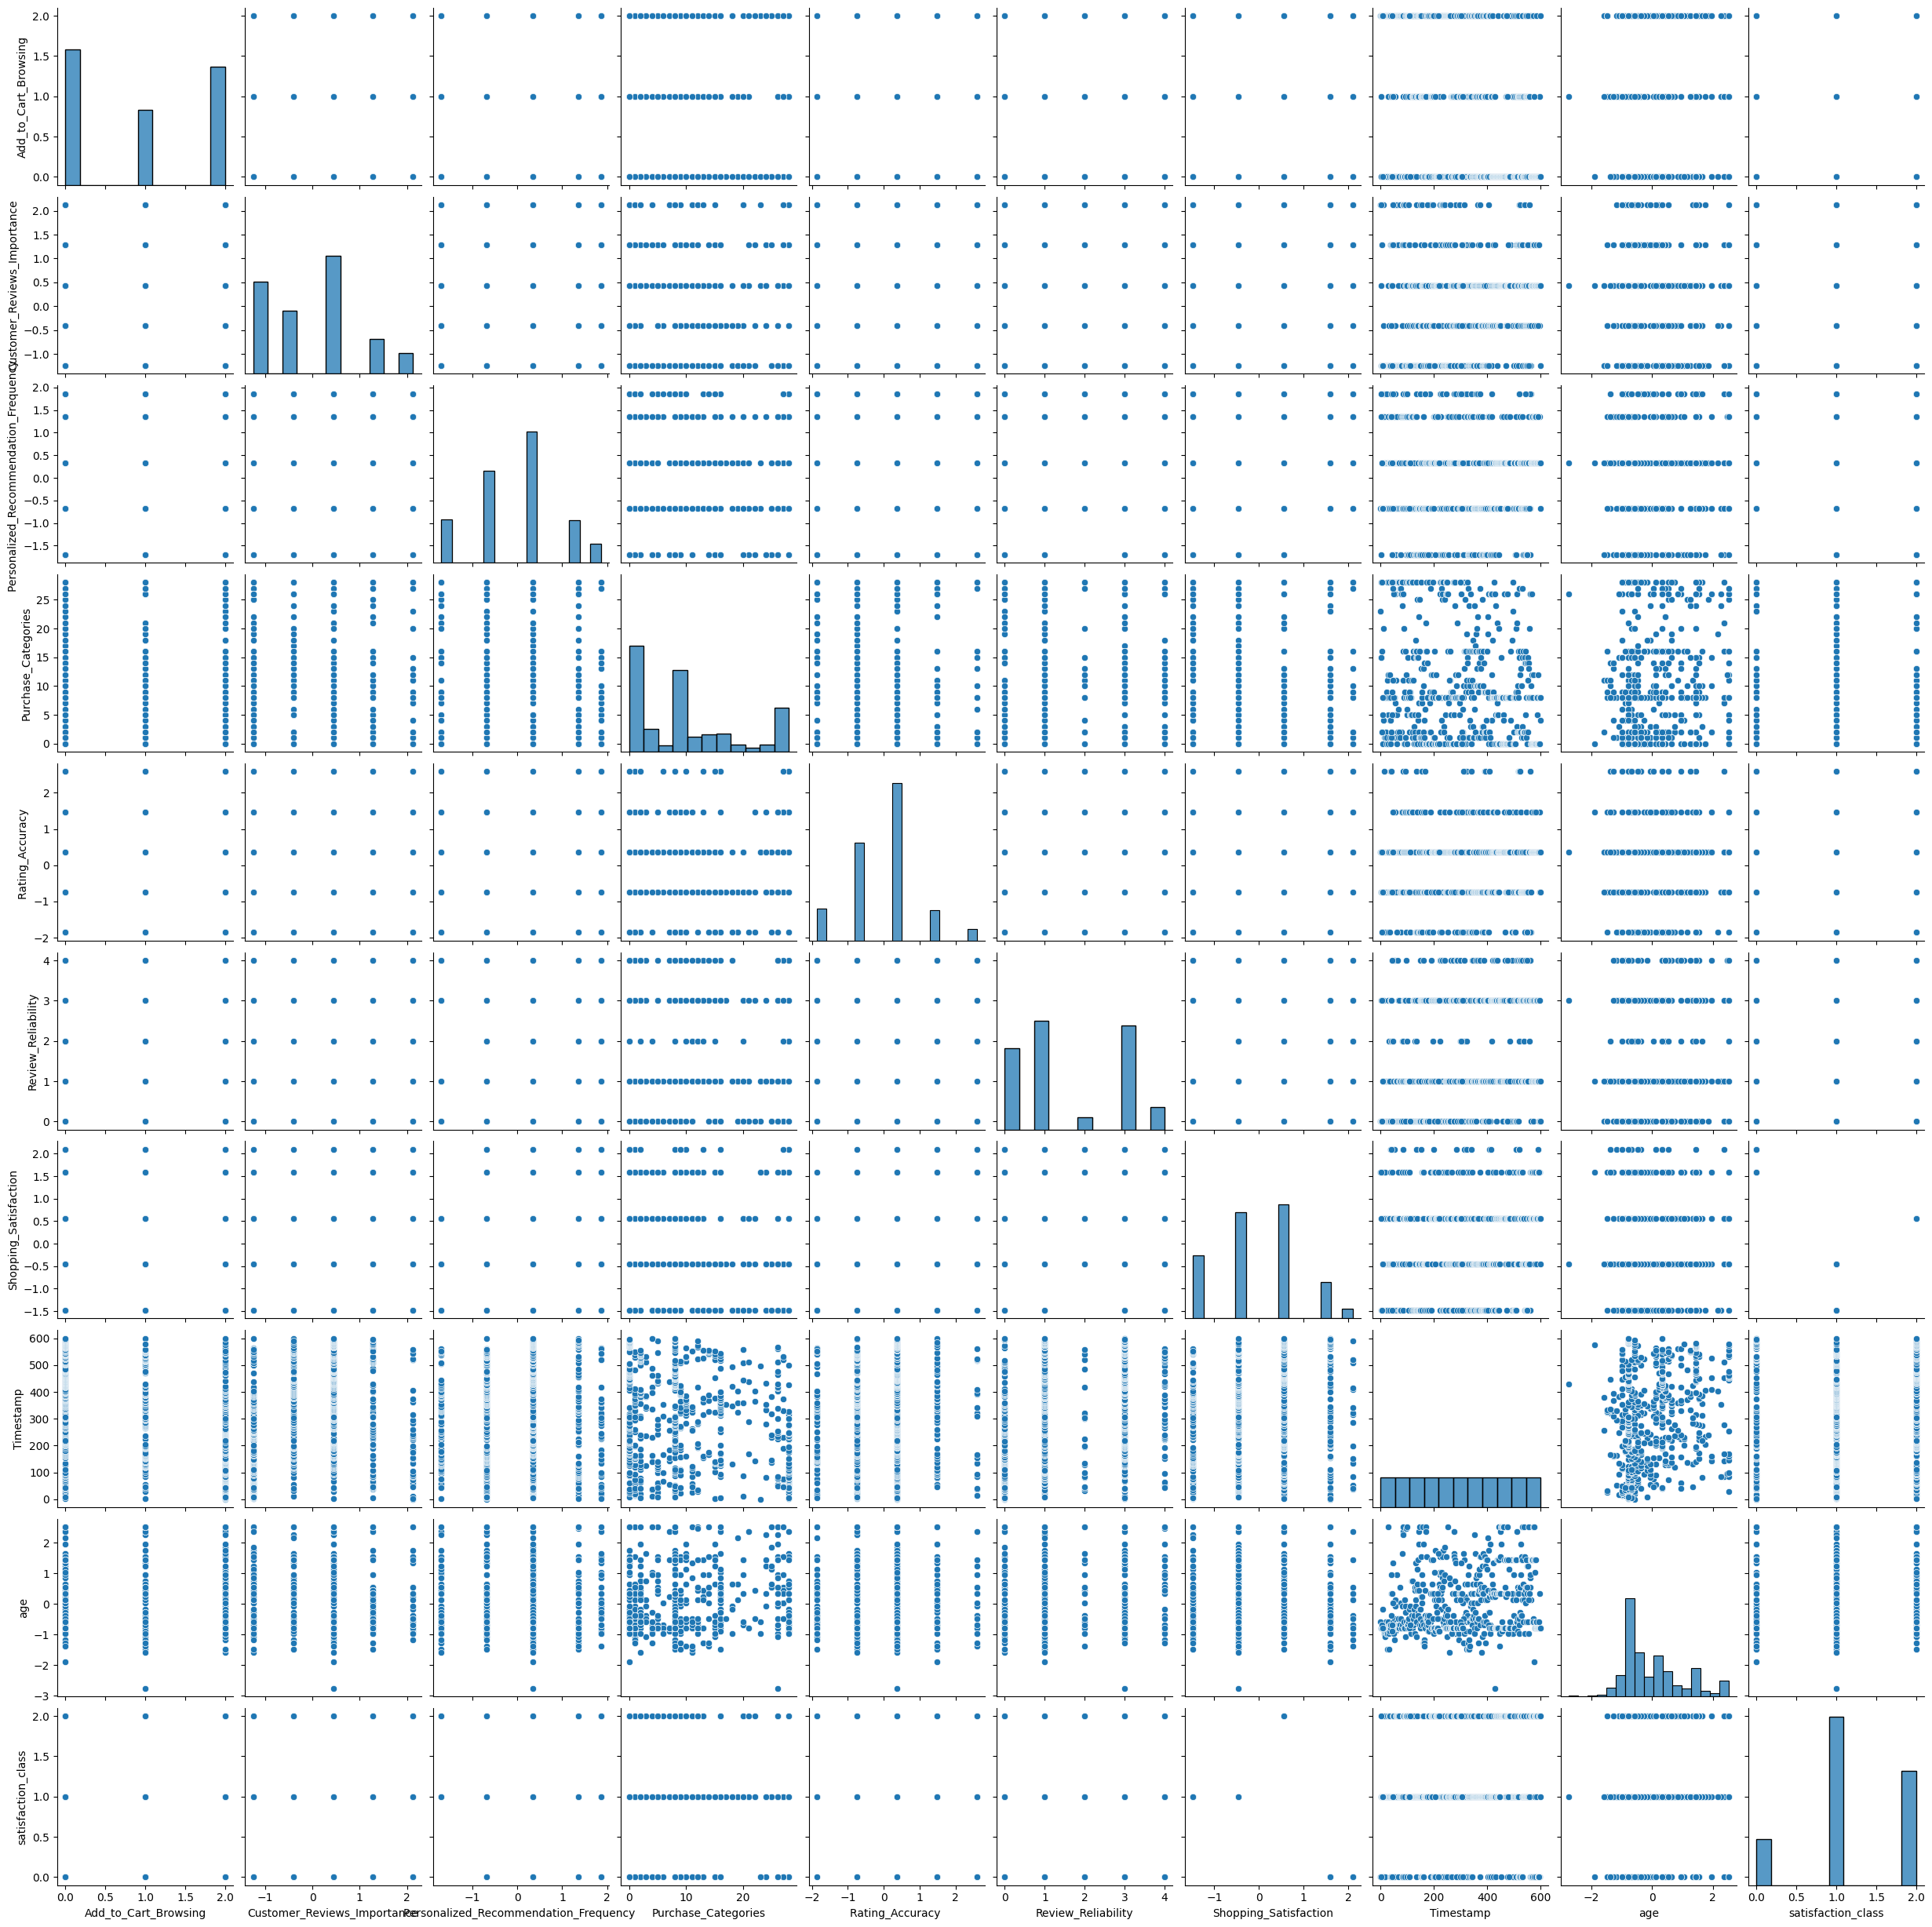

In [ ]:
sns.pairplot(dfc[combined_features])
plt.show()

In [ ]:
x = dfc[combined_features].drop('satisfaction_class', axis=1)
y = dfc['satisfaction_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        45

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

Support Vector Machine accuracy: 0.4628
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.49      0.86      0.63        56
           2       0.33      0.18      0.23        45

    accuracy                           0.46       121
   macro avg       0.28      0.34      0.29       121
weighted avg       0.35      0.46      0.38       121

Gradient Boostng accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1

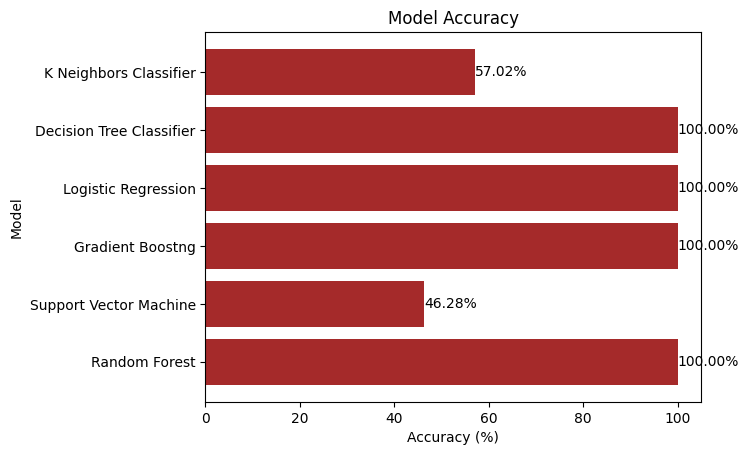

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

#cross validation#

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'x' and 'y' are your feature and target variables
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize your model

# Perform cross-validation
scores = cross_val_score(rfc, x, y, cv=5)  # 5-fold cross-validation

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the average score
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


#confusion matrix#

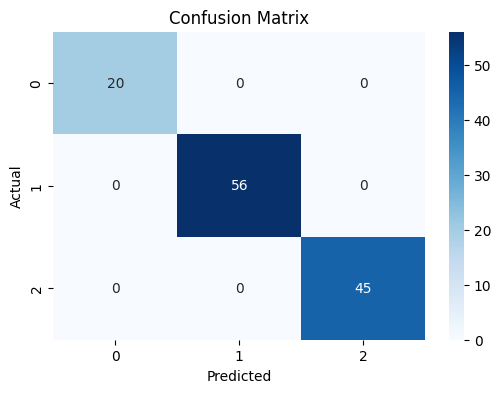

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Receiver Operating Characteristic (ROC) Curve#

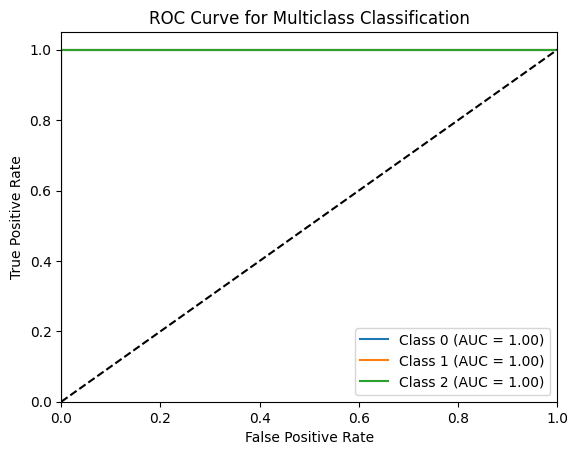

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np #Import numpy

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
rfc = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)) # Use OneVsRestClassifier for multiclass ROC
rfc.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test)) # Binarize the target variable for multiclass ROC

n_classes = y_test_binarized.shape[1]
y_pred_proba = rfc.predict_proba(X_test) # Calculate y_pred_proba for the multiclass case

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

#Area Under the ROC curve (AUC)#

The Area Under the ROC Curve (AUC) measures the model's ability to distinguish between different classes. An AUC of 1 represents a perfect model, while an AUC of 0.5 indicates a model that performs no better than random chance.

Class 0 : The AUC for Class 0 is 0.92, suggesting excellent discrimination. The model has a high probability (92%) of correctly ranking a randomly chosen positive instance of Class 0 higher than a randomly chosen instance from another class.

Class 1 & Class 2 : You should also analyze the AUC scores for Class 1 and Class 2 in a similar manner to understand the model's performance in distinguishing these classes.
Overall Performance: The generally high AUC scores across different classes align with the model's strong performance, as indicated by other metrics like the confusion matrix.
Remember to consider the context of your specific problem and dataset when interpreting these results. For instance, if correctly identifying Class 0 is more critical than other classes, the high AUC for Class 0 is particularly valuable.

It's also beneficial to compare the AUC scores with other evaluation metrics to gain a holistic understanding of your model's performance.

Class 2 Discrimination : The AUC for Class 2 is 0.81, which is still good but lower than the AUC for Class 0 and Class 1. This indicates that the model has a slightly harder time distinguishing Class 2 from the other classes. There's an 81% chance that the model will correctly rank a randomly chosen positive instance of Class 2 higher than a randomly chosen negative instance.

#Save model#

In [ ]:
from joblib import dump, load

# Save the trained model
dump(rfc, 'random_forest_model.joblib')

# Load the saved model
loaded_rfc = load('random_forest_model.joblib')